# Airline Passenger Satisfaction

![attachment:image.png](https://s1.1zoom.me/b5046/340/Passenger_Airplanes_Sky_Clouds_Flight_520179_3840x2160.jpg)

In [1]:
import pandas   as pd
import numpy    as np
import xgboost  as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection    import train_test_split
from sklearn.linear_model       import LinearRegression
from sklearn.metrics            import mean_squared_error
from sklearn.impute             import SimpleImputer
from sklearn.ensemble           import RandomForestRegressor
from scipy.stats                import f_oneway
from sklearn.model_selection    import train_test_split
from sklearn.metrics            import mean_squared_error
from sklearn.impute             import SimpleImputer


df = pd.read_csv('airline_passenger_satisfaction.csv')
df  

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [2]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## What percentage of airline passengers are satisfied? Does it vary by customer type? What about type of travel?

In [3]:
total_passengers = len(df)
satisfied_passengers = len(df[df['Satisfaction'] == 'Satisfied'])
percentage_satisfied = (satisfied_passengers / total_passengers) * 100

print("Percentage of Satisfied Passengers:", percentage_satisfied)
print("Percentage of Neutral or Dissatisfied Passengers:", 100-percentage_satisfied)

Percentage of Satisfied Passengers: 43.44625808438558
Percentage of Neutral or Dissatisfied Passengers: 56.55374191561442


It's possible to see that the majority of customers are neutral or Dissatisfied. He will be interested to analyse the type of customers. That's to say it's their first-time or not.



<Axes: xlabel='Customer Type'>

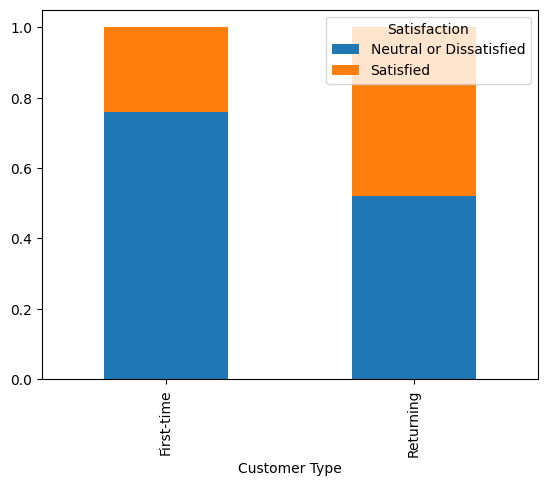

In [4]:
satisfaction_by_customer_type = df.groupby('Customer Type')['Satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_customer_type.plot(kind='bar', stacked=True)

Null Hypothesis (H0): The means of the groups you are comparing are equal. Any observed differences are due to random chance.

Alternative Hypothesis (H1): At least one of the means of the groups you are comparing is different.

In [5]:
satisfaction_mapping = {
    'Neutral or Dissatisfied': 1,
    'Satisfied': 2
}
df['Satisfaction_numeric'] = df['Satisfaction'].map(satisfaction_mapping)

f_statistic, p_value = f_oneway(
    df[df['Customer Type'] == 'First-time']['Satisfaction_numeric'],
    df[df['Customer Type'] == 'Returning']['Satisfaction_numeric']
)

if p_value < 0.05:
    print("There is evidence to reject the hypothesis H0, means aren't equal")
else:
    print("There isn't enough evidences to reject the hypothesis H0, means are equal.")

There is evidence to reject the hypothesis H0, means aren't equal


<Axes: xlabel='Type of Travel'>

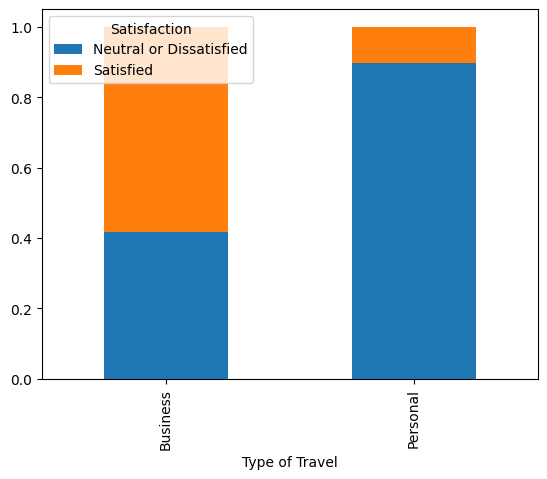

In [6]:
satisfaction_by_travel_type = df.groupby('Type of Travel')['Satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_travel_type.plot(kind='bar', stacked=True)

Null Hypothesis (H0): The means of the groups you are comparing are equal. Any observed differences are due to random chance.

Alternative Hypothesis (H1): At least one of the means of the groups you are comparing is different.

In [7]:
f_statistic, p_value = f_oneway(
    df[df['Type of Travel'] == 'Business']['Satisfaction_numeric'],
    df[df['Type of Travel'] == 'Personal']['Satisfaction_numeric']
)

if p_value < 0.05:
    print("There is evidence to reject the hypothesis H0, means aren't equal")
else:
    print("There isn't enough evidences to reject the hypothesis H0, means are equal.")

There is evidence to reject the hypothesis H0, means aren't equal


## What factors contribute the most to customer satisfaction ? What about dissatisfaction?

Mean Squared Error: 0.10866750173292221


<Axes: xlabel='Feature'>

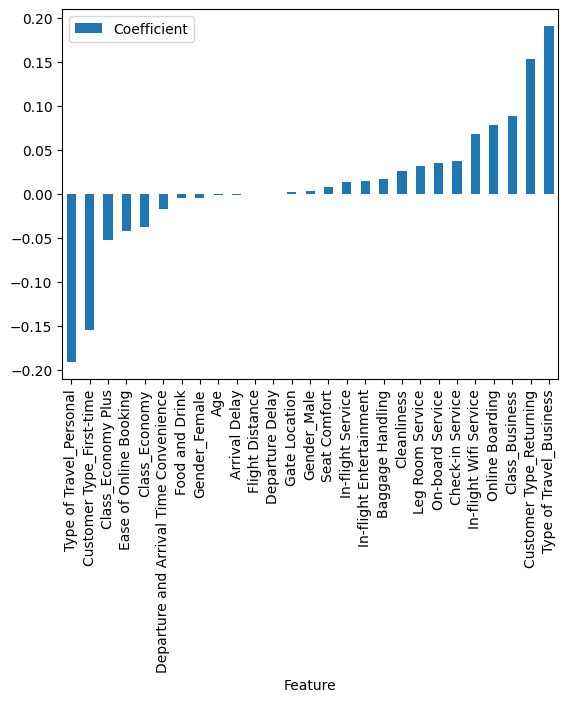

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ID'])

categorical_columns = ['Gender', 'Class', 'Type of Travel', 'Customer Type']
encoded_categorical = pd.get_dummies(df[categorical_columns])
combined_data = pd.concat([numeric_columns, encoded_categorical], axis=1)

X = combined_data.drop("Satisfaction_numeric", axis=1)
y = combined_data["Satisfaction_numeric"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace Nan with mean
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create Linear Regression
model = LinearRegression()

# Train Linear Regression
model.fit(X_train_imputed, y_train)

# Test Linear Regression
y_pred = model.predict(X_test_imputed)

# Calculate performance Linear Regression
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coefficients.sort_values("Coefficient").set_index("Feature").plot(kind="bar")


He can observe that :
- The type of travel affect customer satisfaction. Indeed, the coefficient "Type of Travel : Business" has high rate who contributes to be satisfied and reverse.
- The flight with wifi has a good impact on the satisfaction.
- Customers satisfaction changes with the different classes (less good : Economy Plus, Economy , better : Business).
- Ease of Online Booking is a criterion for the satisfaction.

In [9]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
model.fit(X_train_imputed, y_train)

# Test the Random Forest model
y_pred = model.predict(X_test_imputed)

# Calculate performance of the Random Forest model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can also check feature importance in a RandomForest
importances = model.feature_importances_
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")


Mean Squared Error: 0.027821123344625807
Online Boarding: 0.3606799506352257
In-flight Wifi Service: 0.17878260218845246
Type of Travel_Personal: 0.08618229501435846
Type of Travel_Business: 0.06278268621275843
In-flight Entertainment: 0.04688910296205951
Check-in Service: 0.028553681514300922
Flight Distance: 0.024529103609383176
Age: 0.022753294894024174
Customer Type_First-time: 0.020921072039037526
Customer Type_Returning: 0.018878383587265193
Class_Business: 0.018544104119641257
Baggage Handling: 0.017757346417721854
Gate Location: 0.017248418972491904
In-flight Service: 0.01485205066053469
Seat Comfort: 0.014467572957384274
Leg Room Service: 0.011380994374855808
Cleanliness: 0.010365227621376398
Arrival Delay: 0.009469988147497131
On-board Service: 0.008793218242838354
Departure Delay: 0.007334826827116946
Departure and Arrival Time Convenience: 0.00632146781818748
Food and Drink: 0.004203625888738945
Ease of Online Booking: 0.0036523090593465397
Gender_Female: 0.0013697496124689

XGBoost

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace NaN with mean
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train XGBoost model
model.fit(X_train_imputed, y_train)

# Test XGBoost model
y_pred = model.predict(X_test_imputed)

# Calculate performance of XGBoost model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.030593814967860185


With random forest, it's possible to see that Online Boarding has a important role for the Satisfaction. Indeed, Online Boarding contribues 34 percent to the model.

## What factors are interdependent ?  

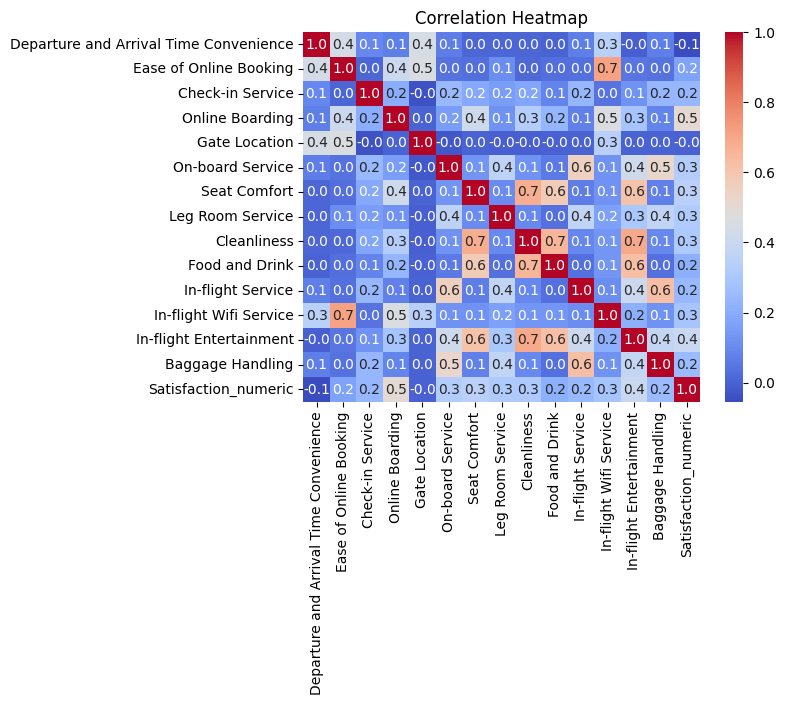

In [11]:
factors = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service',
           'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
           'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment',
           'Baggage Handling']

correlation_matrix = df[factors + ['Satisfaction_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()


This heatmap shows the relation between factors.
it's possible to see that cleanliness has a main role with Food and Drink, Seat Comfort, In-flight Entertainment. Threre is also Seat Comfort.

## Exploratory Data Analysis

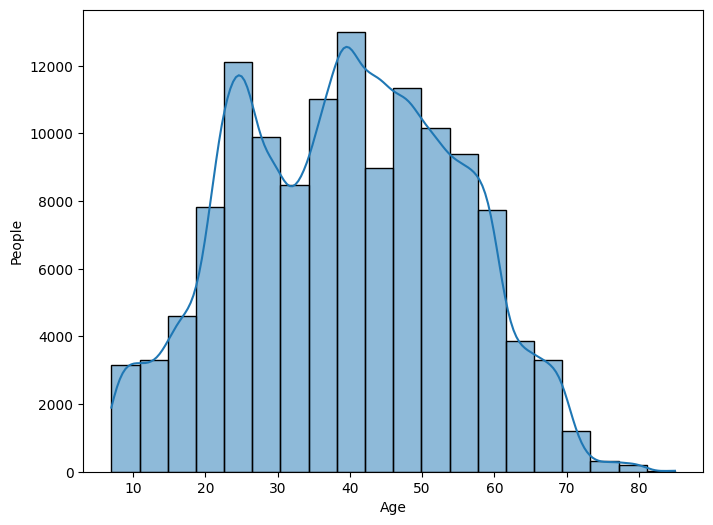

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('')
plt.xlabel('Age')
plt.ylabel('People')
plt.show()

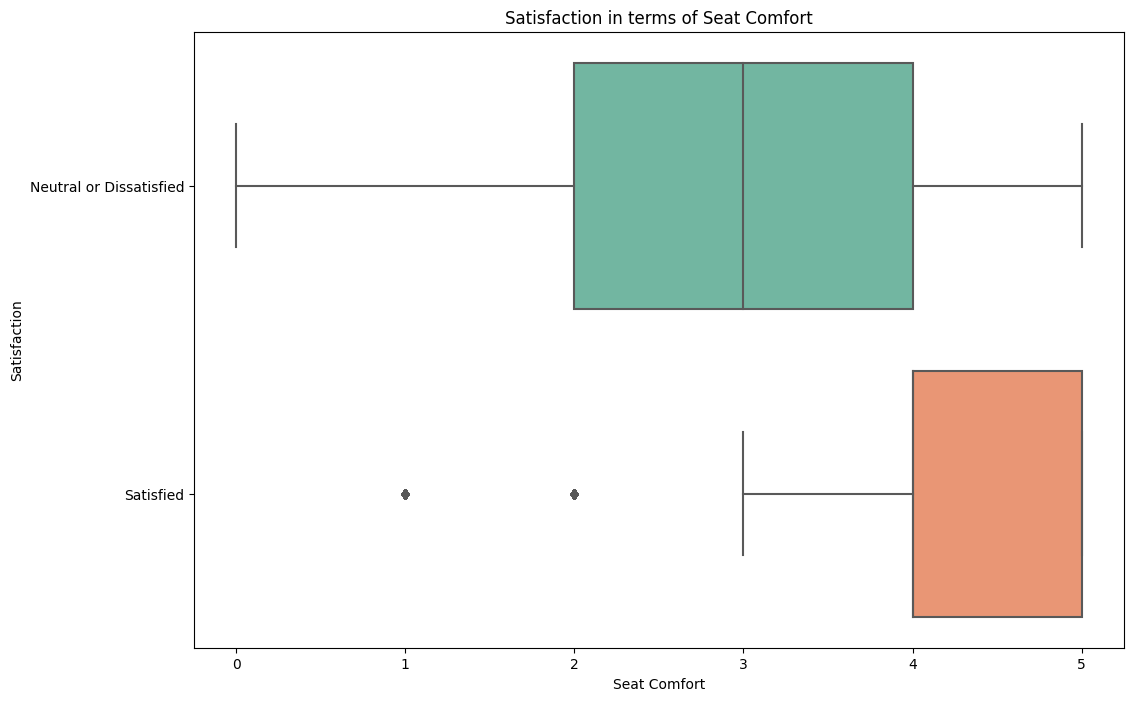

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Seat Comfort', y='Satisfaction', data=df, palette='Set2')
plt.title('Satisfaction in terms of Seat Comfort')
plt.show()

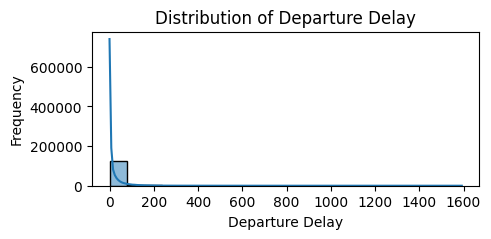

In [21]:
plt.figure(figsize=(5, 2))
sns.histplot(df['Departure Delay'], bins=20, kde=True)
plt.title('Distribution of Departure Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.show()